# Aufgabe 25: Lösungsvorschlag

In [1]:
using SparseArrays
using LinearAlgebra
using Plots
using BenchmarkTools
using Printf
using Random

In [2]:
function Sylvester1(A,B,C)
    m = size(A,1)
    ⊗, E, mat = kron, sparse(I, m, m), x -> reshape(x,m,m)
    return (E ⊗ A - copy(transpose(B)) ⊗ E)\C[:] |> mat
end;

In [3]:
function Sylvester2(A,B,C)
    R, U, = schur(complex(A))              # O(m³)
    S, V, = schur(complex(B))              # O(m³)
    T = U'*C*V                             # O(m³)
    Y = similar(T); 
    for j=1:size(Y,1)                      # m mal:
        Y[:,j] = (R-S[j,j]I)\(T[:,j]+Y[:,1:j-1]*S[1:j-1,j])  # O(m²)
    end                                    # also: for-Schleife: O(m³)
    return U*Y*V'
end;

In [4]:
Random.seed!(0815)
dimensionen = [round(Int, 10^k) for k in range(1, stop=3, length=15)]
# dimensionen = [10,50]
A,B,C = [],[],[]
result_Alg1,result_Alg2 = [],[]
for k=1:length(dimensionen)
    m=dimensionen[k]
    Zufall = () -> rand(m,m)*1im+rand(m,m)
    A,B,C=Zufall(),Zufall(),Zufall()
    @printf("Dimension m =%6i (Lauf %2i von %2i)\n", m, k, length(dimensionen))
    if m≤100 # Sylvester 1 wird nur für kleine Dimensionen gemessen
        push!(result_Alg1,@benchmark Sylvester1(A,B,C))
    end
    push!(result_Alg2,@benchmark Sylvester2(A,B,C))
end

Dimension m =    10 (Lauf  1 von 15)
Dimension m =    14 (Lauf  2 von 15)
Dimension m =    19 (Lauf  3 von 15)
Dimension m =    27 (Lauf  4 von 15)
Dimension m =    37 (Lauf  5 von 15)
Dimension m =    52 (Lauf  6 von 15)
Dimension m =    72 (Lauf  7 von 15)
Dimension m =   100 (Lauf  8 von 15)
Dimension m =   139 (Lauf  9 von 15)
Dimension m =   193 (Lauf 10 von 15)
Dimension m =   268 (Lauf 11 von 15)
Dimension m =   373 (Lauf 12 von 15)
Dimension m =   518 (Lauf 13 von 15)
Dimension m =   720 (Lauf 14 von 15)
Dimension m =  1000 (Lauf 15 von 15)


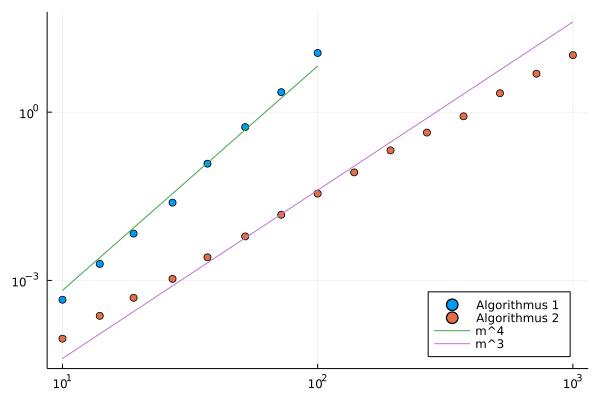

In [5]:
sec = 1e-9 # Umrechnungsfaktor von Nanosekunden auf Sekunden

time1, time2 = time.(mean.(result_Alg1))*sec, time.(mean.(result_Alg2))*sec
dim1 = dimensionen[1:length(time1)]
dim2 = dimensionen[1:end]

scatter(dim1, time1, label="Algorithmus 1", xscale=:log10, yscale=:log10)
scatter!(dim2, time2, label="Algorithmus 2", scale=:log10, yscale=:log10)

plot!(dim1, mean(time1./dim1.^4)*dim1.^4,
    label="m^4", xscale=:log10, yscale=:log10)
plot!(dim2, mean(time2./dim2.^3)*dim2.^3,
    label="m^3", xscale=:log10, yscale=:log10,
    legend=:bottomright)